#### import the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
sns.set()

### louding the data

In [4]:
from google.colab import files
files.upload()

Saving Index2018.csv to Index2018.csv


{'Index2018.csv': b'\xef\xbb\xbfdate,spx,dax,ftse,nikkei\r\n07/01/1994,469.9,2224.95,3445.98,18124.01\r\n10/01/1994,475.27,2225,3440.58,18443.44\r\n11/01/1994,474.13,2228.1,3413.77,18485.25\r\n12/01/1994,474.17,2182.06,3372.02,18793.88\r\n13/01/1994,472.47,2142.37,3360.01,18577.26\r\n14/01/1994,474.91,2151.05,3400.56,18973.7\r\n17/01/1994,473.3,2115.56,3407.83,18725.37\r\n18/01/1994,474.25,2130.35,3437.01,18514.55\r\n19/01/1994,474.3,2132.52,3475.15,19039.4\r\n20/01/1994,474.98,2098.36,3469.99,19183.92\r\n21/01/1994,474.72,2073.94,3484.21,19307.43\r\n24/01/1994,471.97,2107.29,3481.42,18353.24\r\n25/01/1994,470.92,2090.78,3443.97,18648.36\r\n26/01/1994,473.2,2128.66,3436.08,19138.21\r\n27/01/1994,477.05,2123.31,3427.25,18891.79\r\n28/01/1994,478.7,2156.61,3447.45,18757.88\r\n31/01/1994,481.61,2192.6,3491.83,20229.12\r\n01/02/1994,479.62,2181.88,3481.47,20416.34\r\n02/02/1994,482,2184.05,3520.27,20250.03\r\n03/02/1994,480.71,2137.08,3491.48,20174.82\r\n04/02/1994,469.81,2143.9,3475.44,20

In [5]:
df = pd.read_csv("/content/Index2018.csv")
df_copy = df.copy()

### explore the data

In [6]:
df_copy.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [7]:
df_copy.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [8]:
(df_copy.isna()).sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### ploting the data

In [9]:
df_copy.columns

Index(['date', 'spx', 'dax', 'ftse', 'nikkei'], dtype='object')

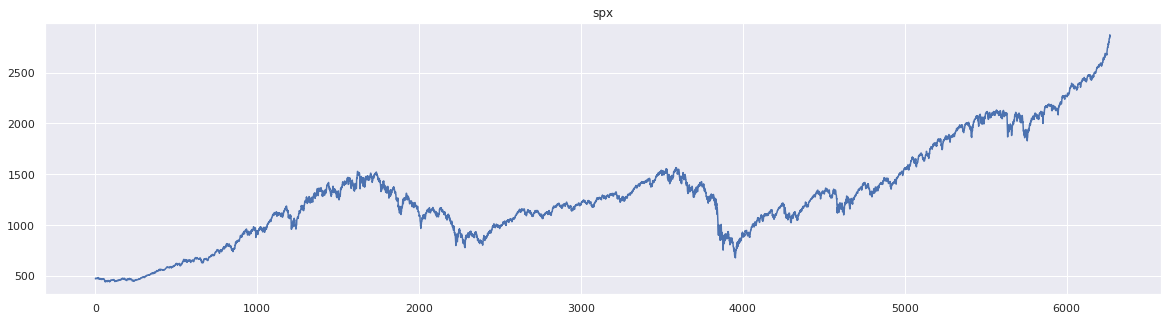

In [10]:
df_copy["spx"].plot(title = "spx", figsize= (20,5))

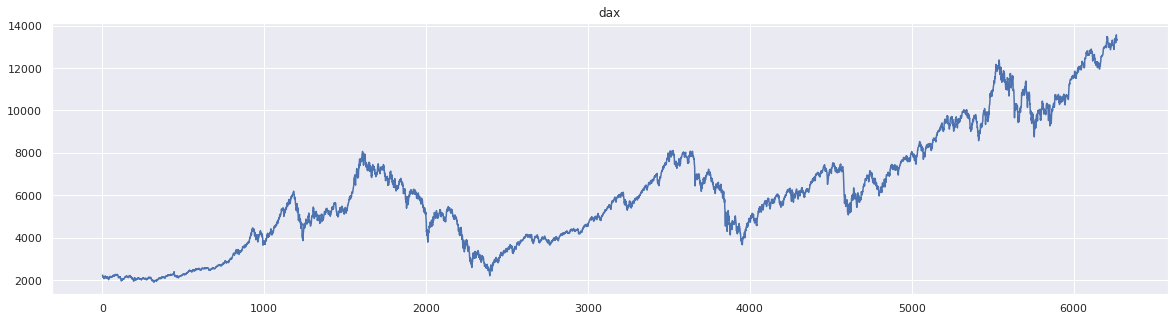

In [11]:
df_copy["dax"].plot(title = "dax", figsize= (20,5))

Text(0.5, 1.0, 'Stok prices')

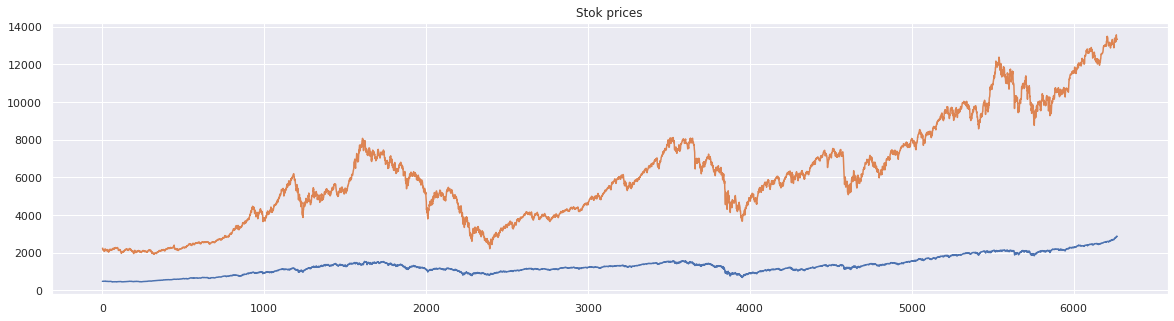

In [12]:
#same plot 
df_copy["spx"].plot(title = "spx", figsize= (20,5))
df_copy["dax"].plot(title = "dax", figsize= (20,5))
plt.title("Stok prices")

### the QQ plot

In [13]:
import pylab

((array([-3.69357572, -3.46171913, -3.33410335, ...,  3.33410335,
          3.46171913,  3.69357572]),
  array([ 438.92    ,  441.49    ,  441.96    , ..., 2839.253031,
         2853.528411, 2872.867839])),
 (476.46056102841175, 1288.1275420815123, 0.9767273150948813))

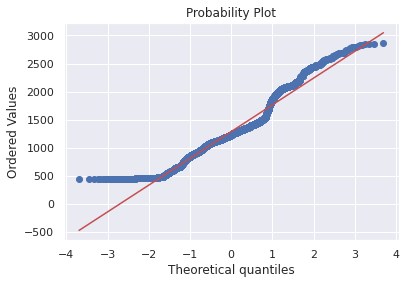

In [14]:
scipy.stats.probplot(df_copy["spx"] , plot=pylab)

### check the date

In [15]:
df_copy["date"].describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

### converting to datetime

In [16]:
#pd.to_datetime
df_copy["date"] = pd.to_datetime(df_copy["date"])

In [17]:
df_copy["date"].describe()

<ipython-input-17-d150af47845e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_copy["date"].describe()


count                    6269
unique                   6269
top       1994-07-01 00:00:00
freq                        1
first     1994-01-02 00:00:00
last      2018-12-01 00:00:00
Name: date, dtype: object

### setting index

In [18]:
df_copy.set_index("date", inplace= True)
df_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-07-01,469.90,2224.95,3445.98,18124.01
1994-10-01,475.27,2225.00,3440.58,18443.44
1994-11-01,474.13,2228.10,3413.77,18485.25
1994-12-01,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [19]:
(df_copy.isna()).sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### setting frequency

In [20]:
df_copy.asfreq("d")

,spx,dax,ftse,nikkei
date,,,,
1994-01-02,479.620000,2181.88,3481.470000,20416.34
1994-01-03,464.440000,2056.61,3270.600000,20216.62
1994-01-04,445.770000,2142.88,3086.400000,19277.16
1994-01-05,NaN,NaN,NaN,NaN
1994-01-06,457.630000,2113.62,2931.900000,21053.11
...,...,...,...,...
2018-11-27,NaN,NaN,NaN,NaN
2018-11-28,NaN,NaN,NaN,NaN
2018-11-29,NaN,NaN,NaN,NaN


In [21]:
# we have nan because of weekends
df_copy =df_copy.asfreq("b")

### handling missing values

In [22]:
(df_copy.isna()).sum()

spx       920
dax       920
ftse      920
nikkei    920
dtype: int64

In [23]:
df_copy["spx"] = df_copy["spx"].fillna(method ="ffill")

In [24]:
(df_copy.isna()).sum()

spx         0
dax       920
ftse      920
nikkei    920
dtype: int64

In [25]:
df_copy["dax"] = df_copy["dax"].fillna("bfill")

In [26]:
df_copy["ftse"] = df_copy["ftse"].fillna(df_copy.ftse.mean())

In [27]:
(df_copy.isna()).sum()

spx         0
dax         0
ftse        0
nikkei    920
dtype: int64

### simpilify the dataset

In [28]:
del df_copy["ftse"] , df_copy["dax"] , df_copy['nikkei']

In [29]:
df_copy.head()

,spx
date,
1994-01-03,464.44
1994-01-04,445.77
1994-01-05,445.77
1994-01-06,457.63
1994-01-07,446.20


### spliting the data

In [30]:
size =int(len(df_copy)*0.8)

In [31]:
train = df_copy[:size]
test = df_copy[size:]

In [32]:
train.tail()

,spx
date,
2013-12-02,1519.427285
2013-12-03,1552.478702
2013-12-04,1588.854623
2013-12-05,1588.854623
2013-12-06,1612.524759


In [33]:
test.head()

,spx
date,
2013-12-09,1683.421752
2013-12-10,1683.421752
2013-12-11,1767.685252
2013-12-12,1775.498239
2013-12-13,1775.318850
